In [66]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix  

In [67]:
# Cargamos el conjunto de datos y visualizamos
df = pd.read_csv('DS_Prediccion_de_Cardiopatia_SinDatosPerdidos.csv', sep=';')
df.head(10)

,Edad,Sexo,Tipo_Dolor_Pecho,Presion_Arterial,Colesterol,Nivel_Azucar_Ayunas,Res_Electrocardiografico,Frecuencia_Cardiaca,Angina_Inducida,DepresionST,DepresionST_Pendiente,NumeroVasos,Prueba_Tálio,Resultado
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [68]:
# Mostramos la cantidad de casos de cada clase en la columna 'Resultado'
df.groupby('Resultado').size()

Resultado
0    495
1    523
dtype: int64

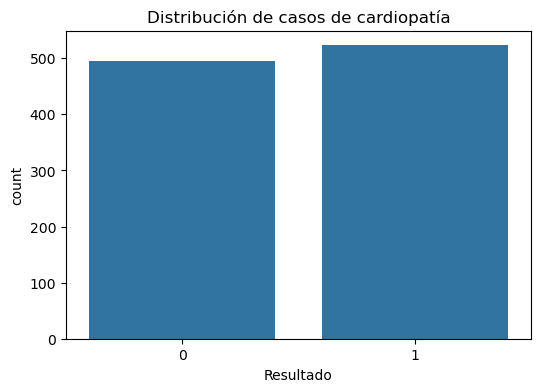

In [53]:
# Gráfico de conteo
plt.figure(figsize=(6,4))
sns.countplot(x='Resultado', data=df)
plt.title('Distribución de casos de cardiopatía')  # Título del gráfico
plt.show() 

In [69]:
#Separaramos X e Y
X = df.drop('Resultado', axis=1).values
y = df['Resultado'].values

In [70]:
#Normalizamos los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
#Separamos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=30)

In [72]:
# Creamos el modelo SVM con un kernel lineal
model = SVC(probability=True, kernel='linear', random_state=42) # SVM con kernel lineal

In [73]:
# Entrenamos el modelo SVM
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [74]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostramos la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Aquí usamos y_pred, no predicciones
labels = ["No Cardiopatía", "Cardiopatía"]
matriz = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Aquí también usamos y_pred
print("\nMatriz de confusión:")
print(pd.DataFrame(matriz, index=labels, columns=labels))

# Mostramos el reporte de clasificación
clasificadores = ["No Cardiopatía", "Cardiopatía"]  # Esto ya estaba bien
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=clasificadores))


Matriz de confusión:
                No Cardiopatía  Cardiopatía
No Cardiopatía             106           31
Cardiopatía                 20          149

Reporte de clasificación:
                precision    recall  f1-score   support

No Cardiopatía       0.84      0.77      0.81       137
   Cardiopatía       0.83      0.88      0.85       169

      accuracy                           0.83       306
     macro avg       0.83      0.83      0.83       306
  weighted avg       0.83      0.83      0.83       306



In [76]:
# Ejemplo de predicción para el modelo de SVM
# Datos de ejemplo: [Edad, Sexo, Tipo_Dolor_Pecho, Presion_Arterial, Colesterol, 
# Nivel_Azucar_Ayunas, Res_Electrocardiografico, Frecuencia_Cardiaca, 
# Angina_Inducida, DepresionST, DepresionST_Pendiente, NumeroVasos, Prueba_Tálio]
ejemplo = [[52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3]]

# Normalizamos el ejemplo
ejemplo_scaled = scaler.transform(ejemplo)

# Predicción
print("\nPredicción para el ejemplo con SVM:")
prediccion_svm = model.predict(ejemplo_scaled)  # Realizamos la predicción con el modelo SVM
print(f"Predicción: {prediccion_svm[0]}")  # Mostramos la predicción binaria (0 o 1)

# Probabilidades
print("Probabilidades de cada clase:")
print(model.predict_proba(ejemplo))


Predicción para el ejemplo con SVM:
Predicción: 0
Probabilidades de cada clase:
[[0.91605524 0.08394476]]
